In [2]:
import pandas as pd
from sklearn.manifold import TSNE, MDS, Isomap, LocallyLinearEmbedding
from sklearn.decomposition import PCA
import umap
from flot_util import *
from flot_visualization import *
from flot_prediction import *
from flot_feature_engineering import *
from flot_clustering import *

c:\Users\rcpsi\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df = pd.read_csv(r'..\dados\Flotacao_Dados_Final.csv',sep=';')

## Data cleaning

In [3]:
df = parse_time(df)
df = remove_missing(df)
df = filter_by_ph(df, threshold=6)
#df = filter_by_flow(df)
df_clean = drop_consecutive_duplicates_tolerance(df)

#df_clean = add_time_features(df_clean)
#df_clean = add_ph_features(df_clean)
#df_clean = add_dosage_flow_features(df_clean)
#df_clean = add_cell_level_stats(df_clean)
#df_clean = add_rolling_features(df_clean)
#df_clean = add_lag_silica_features(df_clean)
#df_clean = add_previous_changes(df_clean)
#df_clean = add_lags(df_clean)

#df_clean = add_delta_silica_regular(df_clean)
#df_clean = filter_by_date_range(df_clean, '2024-07-18', '2024-10-20')

In [4]:
list(df.columns)

['inicio',
 'fim',
 'conc_silica',
 'conc_fe',
 'param_dosagem_amido',
 'dosagem_amina_conc_magnetica',
 'ph_flotacao_linha01',
 'ph_flotacao_linha02',
 'densidade_alimentacao_flotacao',
 'nivel_celula_li640101',
 'TO_LI6401_02',
 'nivel_celula_li640201',
 'nivel_celula_li640202',
 'nivel_celula_li641101',
 'nivel_celula_li641102',
 'nivel_celula_li641201',
 'nivel_celula_li641202',
 'nivel_celula_li642101',
 'nivel_celula_li642201',
 'nivel_celula_li643101',
 'nivel_celula_li643201',
 'vazao_alimentacao_flotacao',
 'operacao',
 'duration_min']

In [5]:
features = df_clean.columns.tolist()
drops = ['fim','conc_fe', 'operacao','duration_min']
target = ['conc_silica']    

features = list(set(features) - set(drops))
features = list(set(features) - set(target))
features = list(set(features) - set(['inicio']))

print(df_clean.shape)
df_clean.dropna(inplace=True)
print(df_clean.shape)
df_clean.drop(columns=drops, inplace=True)

(2620, 24)
(2620, 24)


In [6]:
df_clean.shape

(2620, 20)

In [7]:
df_clean.head()

,inicio,conc_silica,param_dosagem_amido,dosagem_amina_conc_magnetica,ph_flotacao_linha01,ph_flotacao_linha02,densidade_alimentacao_flotacao,nivel_celula_li640101,TO_LI6401_02,nivel_celula_li640201,nivel_celula_li640202,nivel_celula_li641101,nivel_celula_li641102,nivel_celula_li641201,nivel_celula_li641202,nivel_celula_li642101,nivel_celula_li642201,nivel_celula_li643101,nivel_celula_li643201,vazao_alimentacao_flotacao
0,2024-02-27 00:00:00,2.72,492.50,152.54,9.47,7.99,1.60,369.44,370.33,373.06,370.58,349.14,350.88,344.09,349.76,360.64,359.21,360.89,328.20,907.14
1,2024-02-27 01:00:00,1.23,492.50,147.58,9.60,7.95,1.57,369.84,373.12,372.14,374.64,353.68,353.15,340.23,342.37,360.43,348.20,361.36,332.58,677.98
2,2024-02-27 03:00:00,1.93,491.67,135.00,9.50,7.92,1.60,368.38,371.37,368.52,369.66,351.30,352.21,346.62,347.69,360.32,365.79,360.09,340.50,848.19
3,2024-02-27 05:00:00,2.04,491.67,146.53,9.38,9.50,1.60,369.72,369.53,368.99,368.71,349.17,350.05,338.10,341.43,358.81,362.28,359.22,365.90,873.97
4,2024-02-27 07:00:00,4.56,491.67,150.75,9.43,9.52,1.60,370.38,364.81,368.49,365.44,340.96,345.31,358.72,347.50,356.60,355.33,356.71,333.77,922.34


## Exploratory data analysis

In [8]:
plot_time_series_with_gaps(df_clean,'inicio','conc_silica')

In [9]:
# Usage examples:
plot_histogram(df_clean, 'conc_silica')
# plot_scatter(df_clean, 'vazao_alimentacao_flotacao', 'conc_silica')
# plot_pairwise(df_clean, ['conc_silica', 'conc_fe', 'dosagem_amina_conc_magnetica', 'vazao_alimentacao_flotacao'])

In [10]:
df_clean.drop(columns=['inicio'], inplace=True)

In [11]:
#plot_scatter(df_clean, 'ph_flotacao_linha01', 'conc_silica')

In [12]:
plot_scatter(df_clean, 'vazao_alimentacao_flotacao', 'conc_silica')

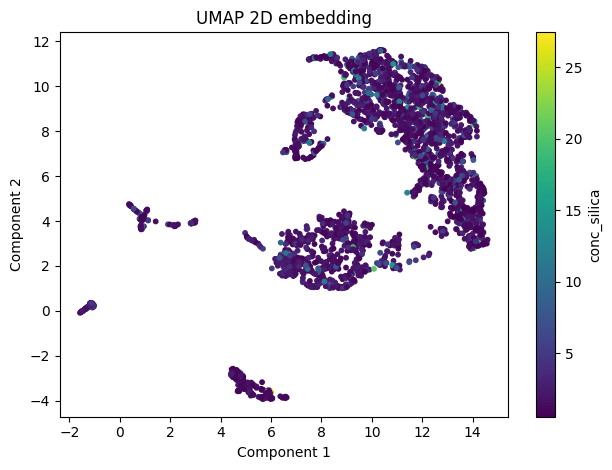

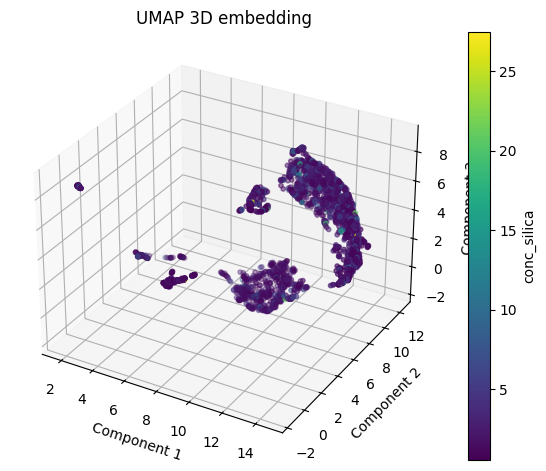

In [13]:
embedding_visualization(
    df_clean,
    source_col='conc_silica',
    methods=['umap'],  # or any subset
)

In [14]:
emb2 = compute_umap(df_clean[features].values, n_components=2, random_state=42)

stats, labels = characterize_embedding_clusters(
    df_clean, emb2, source_col='conc_silica',
     method='kmeans', n_clusters=6
)
print(stats)

importances = cluster_feature_importance(df_clean, labels, source_col='conc_silica')
print(importances)

c:\Users\rcpsi\AppData\Local\Programs\Python\Python313\Lib\site-packages\umap\umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.

c:\Users\rcpsi\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning:

Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.

  File "c:\Users\rcpsi\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\rcpsi\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 554, in run


        param_dosagem_amido                                 \
                      count        mean        std  median   
cluster                                                      
0                       617  504.078622  19.189225  497.57   
1                       604  493.983510   6.684248  494.08   
2                       608  501.198174  18.474070  496.45   
3                       205  494.746683   8.786756  493.55   
4                       479  500.306075  16.037707  496.95   
5                       107  497.665421  17.209750  493.08   

        dosagem_amina_conc_magnetica                                 \
                               count        mean        std  median   
cluster                                                               
0                                617  150.822869  15.202444  146.96   
1                                604  146.798560  11.315307  144.92   
2                                608  152.384309  15.571476  149.00   
3              

In [15]:
stats
stats.to_csv('temp.csv')

In [16]:
importances

nivel_celula_li641202             0.248022
vazao_alimentacao_flotacao        0.229865
nivel_celula_li641102             0.117757
nivel_celula_li642201             0.057328
nivel_celula_li643201             0.051807
nivel_celula_li641201             0.049268
nivel_celula_li640202             0.041232
nivel_celula_li640201             0.030755
nivel_celula_li640101             0.029175
nivel_celula_li643101             0.022312
nivel_celula_li642101             0.020681
nivel_celula_li641101             0.019580
param_dosagem_amido               0.019040
TO_LI6401_02                      0.017784
ph_flotacao_linha01               0.013043
ph_flotacao_linha02               0.012967
densidade_alimentacao_flotacao    0.009762
dosagem_amina_conc_magnetica      0.009622
dtype: float64

## Prediction

In [17]:
df_clean.columns

Index(['conc_silica', 'param_dosagem_amido', 'dosagem_amina_conc_magnetica',
       'ph_flotacao_linha01', 'ph_flotacao_linha02',
       'densidade_alimentacao_flotacao', 'nivel_celula_li640101',
       'TO_LI6401_02', 'nivel_celula_li640201', 'nivel_celula_li640202',
       'nivel_celula_li641101', 'nivel_celula_li641102',
       'nivel_celula_li641201', 'nivel_celula_li641202',
       'nivel_celula_li642101', 'nivel_celula_li642201',
       'nivel_celula_li643101', 'nivel_celula_li643201',
       'vazao_alimentacao_flotacao'],
      dtype='object')

In [18]:
res = evaluate_models(df_clean, features, target=target[0], show_residuals=False)
res

,model,MAE,RMSE,R2,MAPE (%)
0,LinearRegression,1.689094,3.059762,0.078285,73.955741
1,RandomForest,1.628017,3.000436,0.113681,69.891634
2,XGBoost,1.712727,3.046917,0.086008,73.530126


In [19]:
#res_weights = evaluate_models_weights(df_clean, features, target=target[0])
#res_weights

In [20]:
#res_q = evaluate_models_quantile(df_clean, features, target=target[0], show_residuals=False, quantile=0.9)
#res_q

In [21]:
#res_q = evaluate_models_quantile(df_clean, features, target=target[0], show_residuals=False, quantile=0.95)
#res_q

In [22]:
#res_q = evaluate_models_quantile(df_clean, features, target=target[0], show_residuals=False, quantile=0.5)
#res_q

In [23]:
#res_tweedie = evaluate_tweedie_models(df_clean, features, target=target[0], power=1.5,show_residuals=True)
#res_tweedie